In [67]:
import pandas as pd
import numpy as np
from random import randint
from random import random
df = pd.read_csv("../genres_v2.csv")
df.drop(columns=["uri","track_href", "title", "analysis_url", "id","Unnamed: 0"],inplace=True,axis=1)

# Create Inconsistent Data
df["duration_ms"] = [-x if randint(0,10) == 3 else x for x in df["duration_ms"].values]
df["loudness"] = [randint(70, 120) if randint(0,100) == 42 else x for x in df["loudness"].values]
df["key"] = [x+random() for x in df["key"].values]

# Create Dictionary with column name, type, and real type.
fields = {"Fields":[str(x) for x in df.columns], "Types":[str(df[x].dtype) for x in df.columns],
         "Real Type": ["int64" if x == "key" else str(df[x].dtype) for x in df.columns]}

display(df.sample(10))
fields_DataFrame = pd.DataFrame(data=fields)
display(fields_DataFrame)
display(df.sample(5))

C:\Users\96653\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
20243,0.569,0.860,9.790922,-4.116,1,0.0430,0.135000,0.000000,0.1530,0.2890,181.874,audio_features,270960,4,Hiphop,Summertime In Paris
12215,0.337,0.881,8.640600,-3.967,1,0.2500,0.006260,0.270000,0.8290,0.0758,110.241,audio_features,-181996,5,Trap Metal,Idle Hands
16021,0.696,0.635,6.198100,-5.463,0,0.0667,0.172000,0.000000,0.2650,0.8320,155.268,audio_features,247693,4,RnB,Lie About Us
29375,0.305,0.984,6.512874,-6.504,1,0.0801,0.000063,0.165000,0.1970,0.0357,138.090,audio_features,166955,4,trance,NaN
34585,0.627,0.996,1.338461,0.420,1,0.3730,0.046300,0.041900,0.1700,0.2170,149.962,audio_features,249600,4,trap,NaN
20013,0.590,0.672,1.791876,-11.792,1,0.4120,0.125000,0.000001,0.1470,0.6880,206.247,audio_features,-286440,4,Hiphop,93 'Til Infinity
12106,0.524,0.759,6.658069,-5.925,0,0.0423,0.114000,0.000000,0.0795,0.2220,109.927,audio_features,213818,4,Trap Metal,666!
17513,0.875,0.843,7.269762,-3.772,1,0.0368,0.004690,0.003810,0.1060,0.7330,110.792,audio_features,297973,4,RnB,I'm Real
17656,0.653,0.628,3.911815,-4.976,0,0.0786,0.212000,0.000000,0.2000,0.7070,188.020,audio_features,267680,4,RnB,U Remind Me
21484,0.878,0.786,11.756841,-5.273,0,0.1520,0.416000,0.000031,0.1220,0.8310,203.968,audio_features,382240,4,Hiphop,Riders On The Storm - Fredwreck Remix


,Fields,Types,Real Type
0,danceability,float64,float64
1,energy,float64,float64
2,key,float64,int64
3,loudness,float64,float64
4,mode,int64,int64
5,speechiness,float64,float64
6,acousticness,float64,float64
7,instrumentalness,float64,float64
8,liveness,float64,float64
9,valence,float64,float64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
25341,0.646,0.932,11.893826,-9.983,0,0.0496,0.00204,0.819,0.115,0.081,127.990,audio_features,479813,4,techno,NaN
12715,0.563,0.582,11.420834,-9.205,1,0.0318,0.12700,0.000,0.288,0.652,140.124,audio_features,156547,4,Emo,My Beautiful Rescue
32763,0.575,0.888,11.711182,-8.002,1,0.0464,0.00387,0.821,0.142,0.396,141.993,audio_features,399296,4,psytrance,NaN
15239,0.599,0.748,11.172336,-7.714,0,0.3110,0.02550,0.000,0.484,0.234,99.962,audio_features,270507,4,Rap,Huey Knew THEN (feat. Da$H)
25532,0.663,0.555,0.759705,-10.140,1,0.0417,0.00712,0.901,0.112,0.257,131.032,audio_features,323065,4,techno,NaN


In [68]:
# Part 2.b.1
# Dictionary listing which column has inconsistent or missing data.
fields2 = {"Fields":[str(x) for x in df.columns], 
          "Inconsistencies":[True if x in [2, 14] else False for x in range(len(df.columns))],
         "Missing Data": [True if df[col].isnull().any() else False for col in df.columns]}
# Create dataframe for the dictionary.
fields2_DataFrame = pd.DataFrame(data=fields2)

# Change key from float64 to int64
df['key'] = df['key'].apply(lambda x: int(x))

# Impute Song names with NaN values to No name.
df["song_name"] = df["song_name"].fillna("No Name")

# Changing duration_ms to seconds for convenience and fixing inconsistency for negative values.
df.rename(columns = {'duration_ms':"duration_sec"}, inplace = True)
df["duration_sec"] = df["duration_sec"].apply(lambda x: abs(int(x/1000)))

display(fields2_DataFrame)
display(df)

,Fields,Inconsistencies,Missing Data
0,danceability,False,False
1,energy,False,False
2,key,True,False
3,loudness,False,False
4,mode,False,False
5,speechiness,False,False
6,acousticness,False,False
7,instrumentalness,False,False
8,liveness,False,False
9,valence,False,False


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_sec,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269,4,hardstyle,No Name
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210,4,hardstyle,No Name
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234,4,hardstyle,No Name
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323,4,hardstyle,No Name


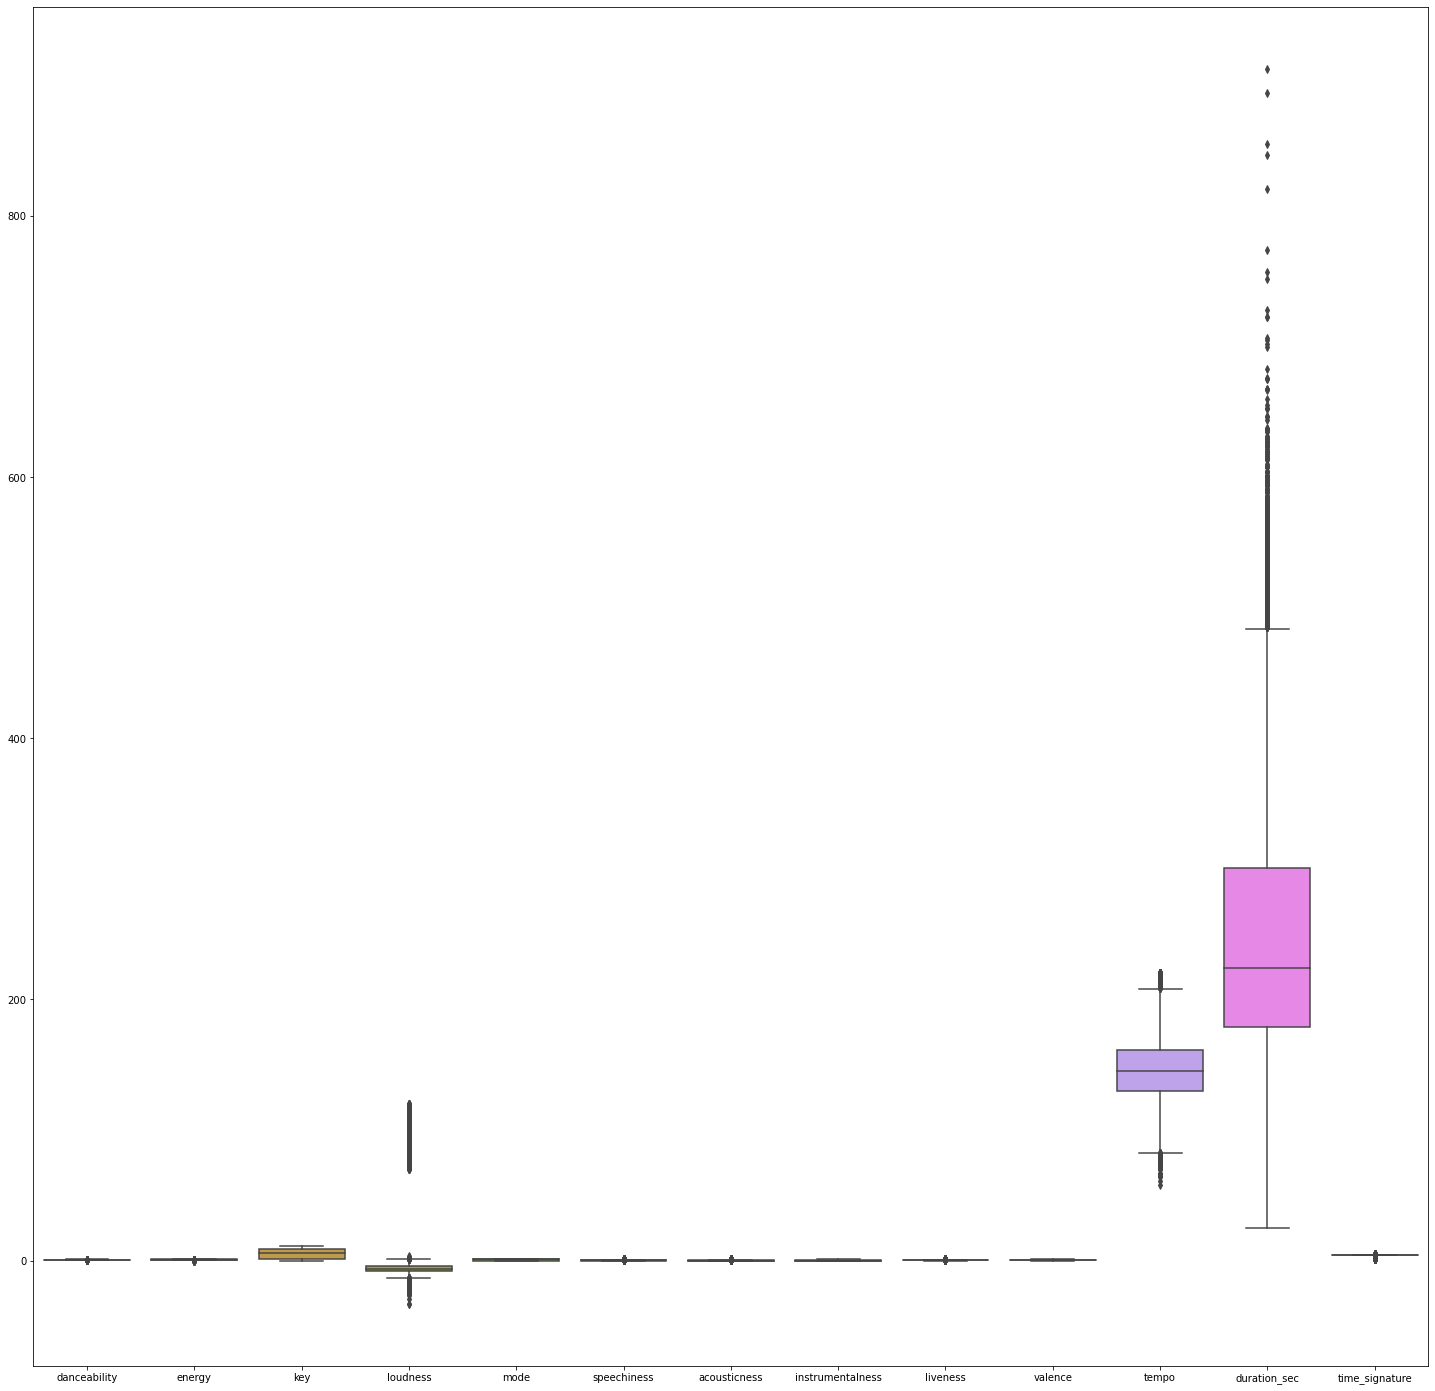

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(25,25))
sns.boxplot(data=df)
plt.show()  

(42305, 13)
(27298, 13)


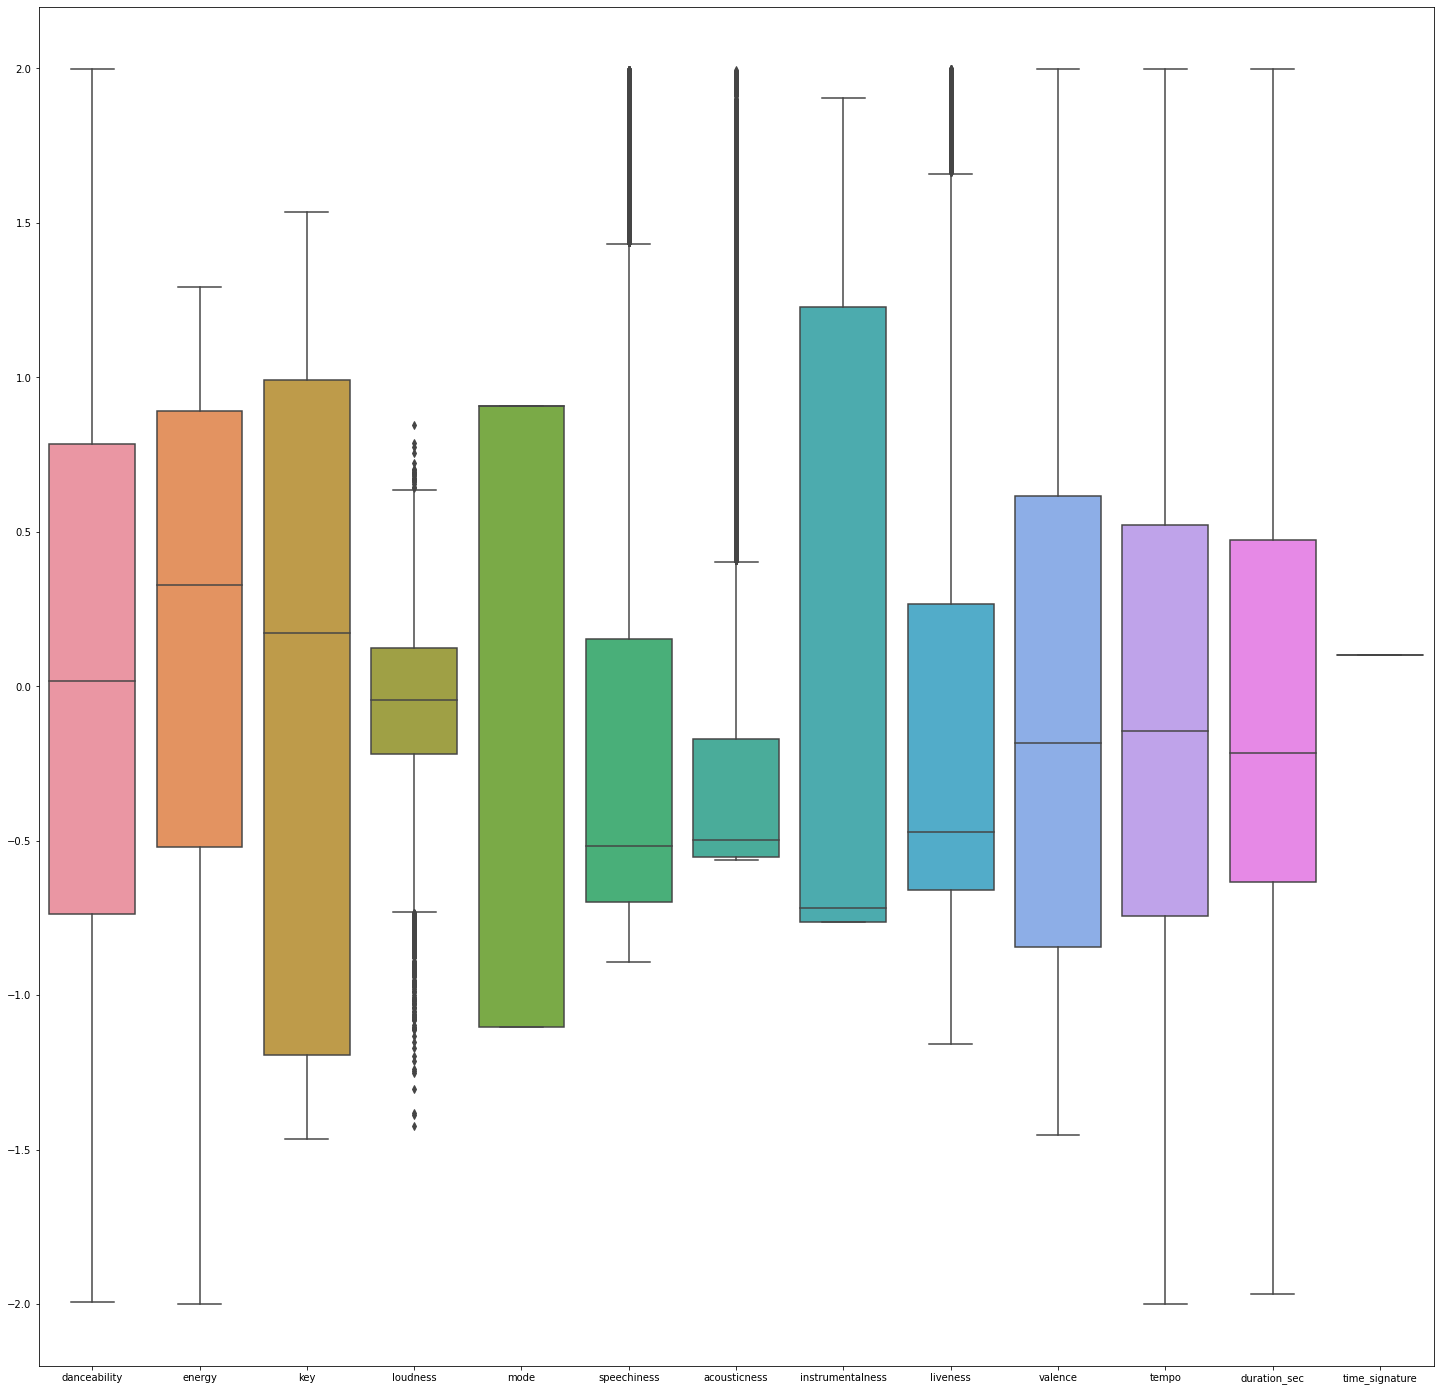

In [70]:
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df[numeric_columns])

df2=pd.DataFrame(scaled_values,columns=df[numeric_columns].columns)

print(df2.shape)
threshold = 2
selected_rows= (df2<threshold).all(axis=1)  & (df2>-threshold).all(axis=1)
selected_index=df[~selected_rows].index
df2.drop(index=selected_index,inplace=True) # for analysis
ndf=df.drop(index=selected_index)  # for interpretation
ndf.reset_index(inplace = True, drop = True) # to reset the index 
print(df2.shape)

plt.figure(figsize=(25,25))
sns.boxplot(data=df2)
plt.show() 


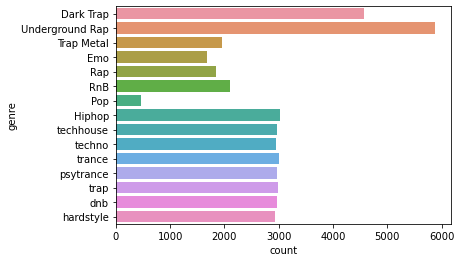

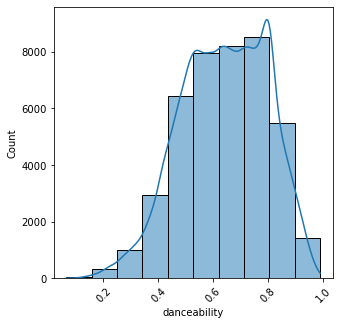

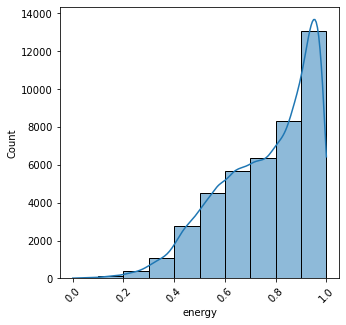

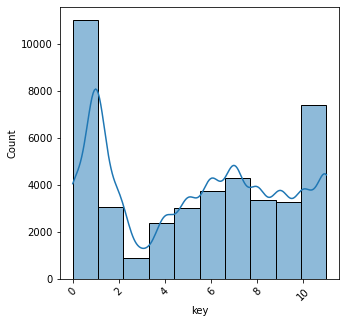

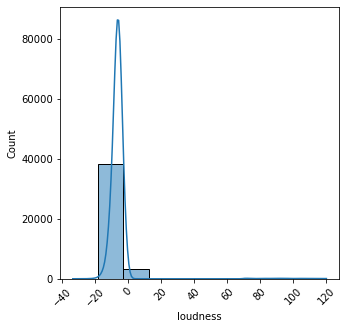

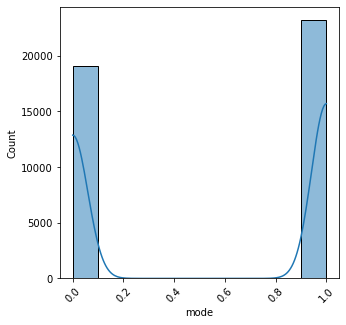

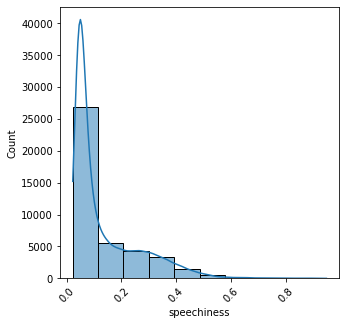

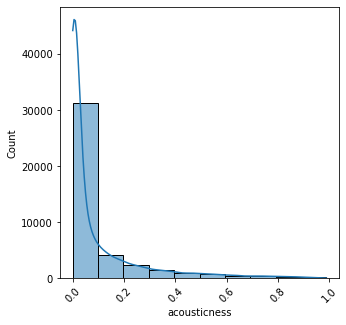

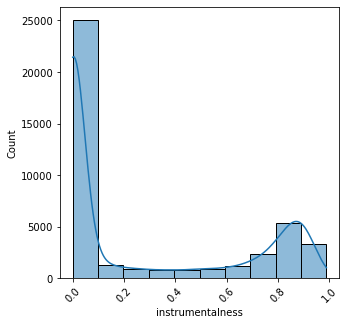

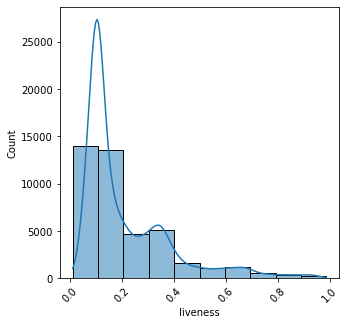

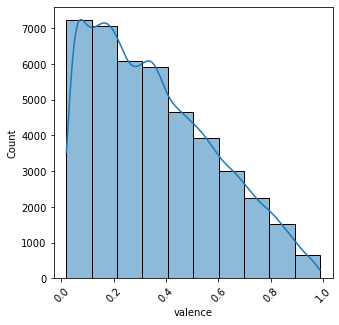

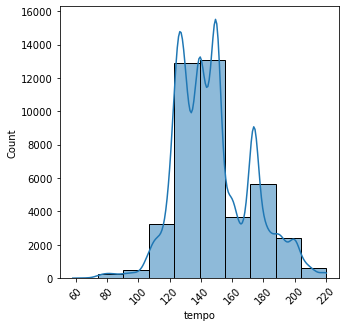

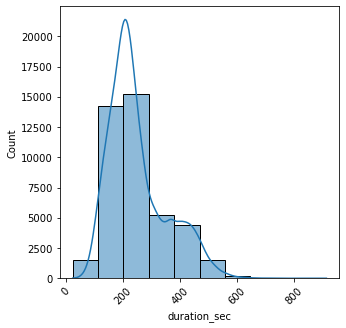

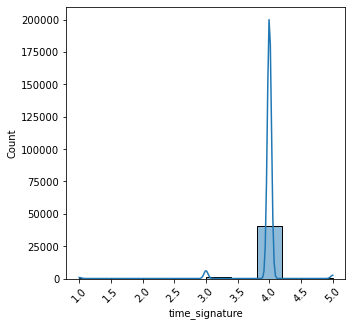

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_sec,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269,4,hardstyle,No Name
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210,4,hardstyle,No Name
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234,4,hardstyle,No Name
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323,4,hardstyle,No Name


In [71]:
num_columns = df.select_dtypes(exclude='object').columns
cat_columns = df.select_dtypes(include='object').columns
 
plt.figure()
sns.countplot(y='genre',data=df);
plt.show()
 
for col in num_columns:
    plt.figure(figsize=(5,5))
    sns.histplot(x=col,bins=10,kde=True,data=df)
    plt.xticks(rotation=45)
    plt.show()
display(df)